In [ ]:
%tensorflow_version 1.x
from google.colab import drive
drive.mount('/content/gdrive')

TensorFlow 1.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
from tqdm import tqdm
from os import listdir
import random
from keras.preprocessing.image import load_img     # Loading images in PIL
from os import listdir  # Gives directories of all files in the form of a list for easy access
from keras.preprocessing.image import img_to_array
#imports
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn import metrics

categories = {'Alert': 0, 'Distracted': 1, 'UpMobile': 2, 'DownMobile': 3}
# For loading test Images
def loadImages1(directory):
  images = []
  labels = []
  for folder in listdir(directory):
    print(folder,  len(listdir(directory+'/'+folder)))
    for image in listdir(directory+'/'+folder):
        filename =  directory + '/' + folder + '/' + image
        try: image = load_img(filename, target_size=(128, 64))
        except: continue
        try: image = img_to_array(image)
        except: continue
        images.append(image)
        labels.append(categories[folder])
  return images, labels

image_Names = []
def loadImages2(directory):
  images = []
  labels = []
  imgnames = []
  for folder in listdir(directory):
    print(folder,  len(listdir(directory+'/'+folder)))
    for image in listdir(directory+'/'+folder):
        imgnames.append(image)
        filename =  directory + '/' + folder + '/' + image
        try: image = load_img(filename, target_size=(128, 64))
        except: continue
        try: image = img_to_array(image)
        except: continue
        images.append(image)
        labels.append(categories[folder])
  return imgnames, images, labels


def shuffle_two(a, b):
  x, y = a, b
  c = list(zip(x, y))
  random.shuffle(c)
  x, y = zip(*c)
  return x, y

def shuffle_three(a, b, c):
  x, y, z = a, b, c
  c = list(zip(x, y, z))
  random.shuffle(c)
  x, y, z = zip(*c)
  return x, y, z

def loadImages(directory, split=0.40):
  TrainImages = []
  Trainlabels = []
  ValidationImages = []
  Validationlabels = []
  Validationfilenames = []

  # Getting Validation Data
  for folder in listdir(directory):
    numImages = len(listdir(directory+'/'+folder))
    print(folder + ':',  numImages)
    UI = []
    UL = []
    UF = []

    # Extract Unique or Unaugmented Images of the current category
    for i in range(0, numImages, Augmentation[folder]):
        filename =  directory + '/' + folder + '/' + str(i) + '.jpg'
        #print(filename)
        try: image = load_img(filename, target_size=(height, width))
        except: continue
        try: image = img_to_array(image)
        except: continue
        UI.append(image)
        UL.append(categories[folder])
        UF.append(i)

    extractImages = len(UI)*split

    # Shuffle these unique images and add a percentage of them to the validation splot
    uniqueImages, uniqueLabels, uniqueFilenames = shuffle_three(UI, UL, UF)
    ValidationImages += uniqueImages[:int(extractImages)]
    Validationlabels += uniqueLabels[:int(extractImages)]
    UF = uniqueFilenames[:int(extractImages)]
    print('Getting',  int(extractImages), 'out of', len(UI),'unique images for validation')
    print(' ')

    # Also, add the next X augmented filenames/images in the list too, so they don't get added to the training set
    for filename in UF:
      Validationfilenames.append(directory +'/' + folder +'/' + str(filename) + '.jpg')
      index = int(filename)
      count = 1
      for i in range(Augmentation[folder]-1):
        Validationfilenames.append(directory +'/' + folder +'/' + str(index+count) + '.jpg')
        count += 1

  print("--------------------------------------------")
  # Getting Training Data
  for folder in listdir(directory):
    count = 0
    for image in listdir(directory+'/'+folder):
      filename =  directory + '/' + folder + '/' + image
      if filename not in Validationfilenames:                       # Check if it isn't one of the files corresponding to validation images
          try: image = load_img(filename, target_size=(height, width))
          except: continue
          try: image = img_to_array(image)
          except: continue
          TrainImages.append(image)
          Trainlabels.append(categories[folder])
          count += 1
          if categories[folder] == 0 and count == 90000: break
    print('Training Data Extracted From ' + folder, count)

  return TrainImages, Trainlabels, ValidationImages, Validationlabels


def NeuralNetwork(shape):
  from keras.models import Model
  from keras.layers import Input, Dense , Dropout
  in_shape = shape
  in1 = Input(shape = in_shape)
  n = BatchNormalization()(in1)
  dr1 = Dropout(0.5)(n)
  c1 = Dense(2048,  activation='relu')(dr1)
  dr2 = Dropout(0.5)(c1)
  c2 = Dense(1024, activation='relu')(dr2)
  dr3 = Dropout(0.5)(c2)
  c3 = Dense(512, activation='relu')(dr3)
  dr4 = Dropout(0.5)(c3)        
  c4 = Dense(256, activation='relu')(dr4)    
  dr5 = Dropout(0.5)(c4)
  output = Dense(4, activation='softmax')(dr5)
  model = Model(inputs = in1, outputs = output)
  model.compile(optimizer = 'Adagrad', loss = 'categorical_crossentropy', metrics = ['acc'])
  return model






height = 96
width = 32

categories = {'Alert': 0, 'Distracted': 1, 'UpMobile': 2, 'DownMobile': 3}




Using TensorFlow backend.


In [ ]:
!cp '/content/gdrive/My Drive/TestSet4.zip' TestSet.zip
!unzip TestSet.zip

!cp '/content/gdrive/My Drive/ObjectTestData3.zip' ObjectTestData3.zip
!unzip ObjectTestData3.zip

!cp '/content/gdrive/My Drive/ObjectDetectData.zip' ObjectDetectData.zip
!unzip ObjectDetectData.zip



AugNum = 0
for i in range(3,5):
  AugNum = i
  if AugNum == 3:
    !cp '/content/gdrive/My Drive/AugmentedData3.zip' AugmentedData3.zip
    !unzip AugmentedData3.zip
    Augmentation = {'Alert':2 , 'Distracted':4, 'UpMobile': 5, 'DownMobile': 4} # Aug3
    dir = 'AugmentedData3'

  if AugNum == 4:
    !cp '/content/gdrive/My Drive/AugmentedData4.zip' AugmentedData4.zip
    !unzip AugmentedData4.zip
    Augmentation = {'Alert':4 , 'Distracted':6, 'UpMobile': 8, 'DownMobile': 6} # Aug4
    dir = 'AugmentedData4'

  if AugNum == 5:
    !cp '/content/gdrive/My Drive/AugmentedData5.zip' AugmentedData5.zip
    !unzip AugmentedData5.zip
    Augmentation = {'Alert':8 , 'Distracted':12, 'UpMobile': 16, 'DownMobile': 12} # Aug5
    dir = 'AugmentedData5'



Streaming output truncated to the last 5000 lines.
  inflating: AugmentedData4/Distracted/1062.jpg  
  inflating: AugmentedData4/DownMobile/1023.jpg  
  inflating: AugmentedData4/DownMobile/1251.jpg  
  inflating: AugmentedData4/DownMobile/853.jpg  
  inflating: AugmentedData4/UpMobile/1332.jpg  
  inflating: AugmentedData4/Distracted/534.jpg  
  inflating: AugmentedData4/Distracted/1041.jpg  
  inflating: AugmentedData4/DownMobile/1342.jpg  
  inflating: AugmentedData4/Distracted/848.jpg  
  inflating: AugmentedData4/DownMobile/1363.jpg  
  inflating: AugmentedData4/DownMobile/1014.jpg  
  inflating: AugmentedData4/Alert/1070.jpg  
  inflating: AugmentedData4/UpMobile/1138.jpg  
  inflating: AugmentedData4/DownMobile/999.jpg  
  inflating: AugmentedData4/Alert/1078.jpg  
  inflating: AugmentedData4/Distracted/1105.jpg  
  inflating: AugmentedData4/Distracted/757.jpg  
  inflating: AugmentedData4/Distracted/575.jpg  
  inflating: AugmentedData4/Distracted/891.jpg  
  inflating: Augment

Distracted: 1072
Getting 26 out of 178 unique images for validation
 
DownMobile: 1096
Getting 27 out of 182 unique images for validation
 
UpMobile: 915
Getting 17 out of 114 unique images for validation
 
Alert: 844
Getting 31 out of 210 unique images for validation
 
--------------------------------------------
Training Data Extracted From Distracted 916
Training Data Extracted From DownMobile 934
Training Data Extracted From UpMobile 783
Training Data Extracted From Alert 720
 
Total Number of Train Images & Labels | Val Images & Labels:  3353 3353  |  101 101
3353
3353
101
101
(3353, 768)
Train on 3353 samples, validate on 101 samples
Epoch 1/200
3353/3353 [==============================] - 3s 967us/step - loss: 2.1712 - acc: 0.2792 - val_loss: 1.3456 - val_acc: 0.4356
Epoch 2/200
3353/3353 [==============================] - 2s 712us/step - loss: 1.3812 - acc: 0.3203 - val_loss: 1.3397 - val_acc: 0.3960
Epoch 3/200
3353/3353 [==============================] - 2s 701us/step - loss:

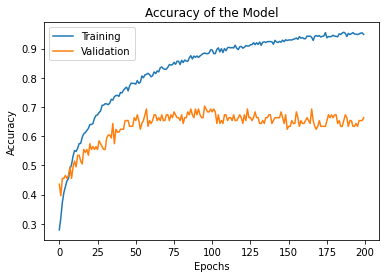

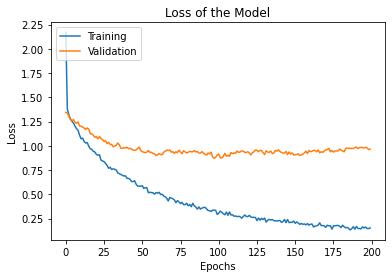

(3353, 96, 32, 3)
(3353, 9216)
Train on 3353 samples, validate on 101 samples
Epoch 1/200
3353/3353 [==============================] - 6s 2ms/step - loss: 12.2984 - acc: 0.2738 - val_loss: 1.3187 - val_acc: 0.4059
Epoch 2/200
3353/3353 [==============================] - 5s 2ms/step - loss: 1.7042 - acc: 0.2792 - val_loss: 1.3656 - val_acc: 0.4257
Epoch 3/200
3353/3353 [==============================] - 5s 1ms/step - loss: 1.5449 - acc: 0.2792 - val_loss: 1.3735 - val_acc: 0.2871
Epoch 4/200
3353/3353 [==============================] - 5s 2ms/step - loss: 1.4693 - acc: 0.2979 - val_loss: 1.3626 - val_acc: 0.4059
Epoch 5/200
3353/3353 [==============================] - 5s 2ms/step - loss: 1.4263 - acc: 0.3018 - val_loss: 1.3594 - val_acc: 0.4554
Epoch 6/200
3353/3353 [==============================] - 5s 2ms/step - loss: 1.4093 - acc: 0.3135 - val_loss: 1.3552 - val_acc: 0.3663
Epoch 7/200
3353/3353 [==============================] - 5s 2ms/step - loss: 1.3879 - acc: 0.3152 - val_loss: 1

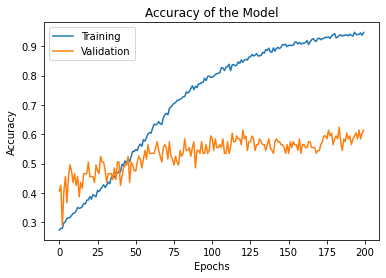

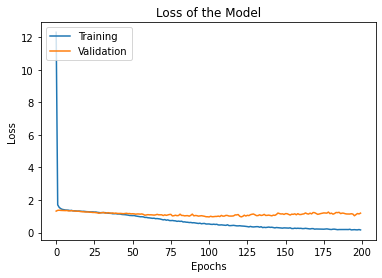

Distracted 20
DownMobile 29
UpMobile 31
Alert 32
Total Number of Test Images & Labels:  112 112
112
(128, 64, 3)
112
Category             Accuracy      Ratio  FP's:   Alert    Distracted   UpMobile    DownMobile
Overall Accuracy:      22 %       25/112
Alert Accuracy:        34 %       11/32                      65.62 %      0.0 %      0.0 %
Distracted Accuracy:   70 %       14/20          25.0 %                    5.0 %      0.0 %
UpMobile Accuracy:     0 %       0/31          45.16 %    54.84 %                   0.0 %
DownMobile Accuracy:   0 %       0/29          27.59 %    72.41 %      0.0 %
Distracted 20
DownMobile 29
UpMobile 31
Alert 32
Total Number of Test Images & Labels:  112 112
112
(128, 64, 3)
112
Category             Accuracy      Ratio  FP's:   Alert    Distracted   UpMobile    DownMobile
Overall Accuracy:      30 %       34/112
Alert Accuracy:        3 %       1/32                      0.0 %      93.75 %      3.12 %
Distracted Accuracy:   0 %       0/20          5.0 %  

In [ ]:
E = 200
#this code runs for augment data 3 only
#loop setting can be changed to make it run for different data
AugNum = 0
for i in range(3,4):
  AugNum = i
  dir = ''
  if AugNum == 3:
    dir = 'AugmentedData3'

  if AugNum == 4:
    dir = 'AugmentedData4'

  if AugNum == 5:
    dir = 'AugmentedData5'

#---------------------------------Making Training Data ------------------------#    
  #Unshuffled images and labels 
  a, b, c, d = loadImages(dir, 0.15) ##CHANGE AUG DICTIONARY
  a = [im.astype(int) for im in a]
  c = [im.astype(int) for im in c]


  #Shuffled Training Images and Labels
  TrainImages, Trainlabels = shuffle_two(a, b)
  TrainImages, Trainlabels = np.array(TrainImages), np.array(Trainlabels)

  #Shuffled Validation Images and Labels
  ValidationImages, Validationlabels = shuffle_two(c, d)
  ValidationImages, Validationlabels = np.array(ValidationImages), np.array(Validationlabels)



  # Total Count
  TimageCount = len(TrainImages)
  TlabelCount = len(Trainlabels)
  VimageCount = len(ValidationImages)
  VlabelCount = len(Validationlabels)
  print(' ')
  print('Total Number of Train Images & Labels | Val Images & Labels: ', TimageCount, TlabelCount, ' | ',VimageCount, VlabelCount)

#--------------------------------------------------------------------------------#

#-------------------------------- HOG + NN + TRAINING CODE------------------------#

  x_train = TrainImages
  y_train = Trainlabels
  x_val = ValidationImages
  y_val = Validationlabels

#--------------------------HOG FEATURE VECTOR GENERATION-------------------------#

#------------------------------------------------------------------------------#
  #loading the data and grayscaling it
  data_gray_train = [ color.rgb2gray(i) for i in x_train]
  data_gray_val = [ color.rgb2gray(i) for i in x_val]
#------------------------------------------------------------------------------#
  #hog code for generating the feature vectors
  ppc = 8 #pixels per cell means that 32 by 32 is 1024. 1024/ 8 by 8 is 16 so we have 4 by 4 cells
  x = 1 #cells per block
  o = 16 # bins in histogram

  hog_features_train = []
  for image in data_gray_train:
      fd = hog(image, orientations=o, pixels_per_cell=(ppc,ppc),cells_per_block=(x, x),visualize=False,block_norm= 'L2') 
      hog_features_train.append(fd)
  hog_features_train = np.array(hog_features_train)
  #y_train = np.array(y_train)

  hog_features_val = []
  for image in data_gray_val:
      fd = hog(image, orientations=o, pixels_per_cell=(ppc,ppc),cells_per_block=(x, x),visualize=False,block_norm= 'L2')
      hog_features_val.append(fd)
  hog_features_val = np.array(hog_features_val)
  #y_test = np.array(y_test)
  print(len(hog_features_train))
  print(len(y_train))
  print(len(hog_features_val))
  print(len(y_val))
  print(hog_features_train.shape)
  from keras.layers import BatchNormalization
  X_train = hog_features_train
  X_val = hog_features_val
  #------------------------------------------------------------------------------#
  #Normalisation
  means = X_train.mean(axis = 0)
  stddev = X_train.std(axis = 0)
  X_train = (X_train-means)/stddev

  means = X_val.mean(axis = 0)
  stddev = X_val.std(axis = 0)
  X_val = (X_val-means)/stddev

  #------------------------------------------------------------------------------#
  from keras.utils import to_categorical
  Y_train = to_categorical(y_train)
  Y_val = to_categorical(y_val)
  SHAPE = X_train[0].shape 
  #------------------------------------------------------------------------------#
  #making the model
  ModelNN = NeuralNetwork(SHAPE)
  history = ModelNN.fit(X_train, Y_train, epochs = E, batch_size = 16, validation_data=(X_val, Y_val))
  #------------------------------------------------------------------------------#
  #evaluation of results on Validation data as a whole
  print('\nhistory dict:', history.history)
  val_acc = history.history['val_acc']
  #------------------------------------------------------------------------------#
  # Plotting traininf and validation accuracy values and loss values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Accuracy of the Model')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.show()
  plt.figure()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of the Model')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.show()
  #-------------------------------------------------------------------------------#
  #---------------------------------NN + TRAINING CODE----------------------------#
  #loading data for training and testing
  # X is the images, y is the labels
  X_train = x_train
  print(X_train.shape)
  Y_train = y_train
  X_val = x_val 
  Y_val = y_val
  #------------------------------------------------------------------------------#
  #normalisation  of the data
  means = X_train.mean(axis = 0)
  stddev = X_train.std(axis = 0)
  X_train = (X_train-means)/stddev
  means = X_val.mean(axis = 0)
  stddev = X_val.std(axis = 0)
  X_val = (X_val-means)/stddev
  #------------------------------------------------------------------------------#
  #flattening out training data
  X_train_new = []
  for i in X_train:
    X_train_new.append(i.flatten())
  X_train_new = np.array(X_train_new)
  #------------------------------------------------------------------------------#
  #flattening out test data
  X_val_new = []
  for i in X_val:
    X_val_new.append(i.flatten())
  X_val_new = np.array(X_val_new)
  X_train = X_train_new
  X_val = X_val_new
  print(X_train.shape)
  from keras.utils import to_categorical
  Y_train = to_categorical(Y_train)
  Y_val = to_categorical(Y_val)
  SHAPE = X_train[0].shape
  ModelNN = NeuralNetwork(SHAPE)
  history = ModelNN.fit(X_train, Y_train, epochs = E, batch_size = 16, validation_data=(X_val, Y_val))
  #------------------------------------------------------------------------------#
  #evaluation of results on Validation data as a whole
  print('\nhistory dict:', history.history)
  val_acc = history.history['val_acc']
  #------------------------------------------------------------------------------#
  # Plotting traininf and validation accuracy values and loss values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Accuracy of the Model')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.show()
  plt.figure()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss of the Model')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training', 'Validation'], loc='upper left')
  plt.show()
  #---------------------------------TESTING--------------------------------------#
  #-------------HOG + NN TESTING ON TEST SET 4 (testing data)--------------------#
  # Test Images & Labels
  testImages, testLabels = loadImages1('TestSet4')
  testImages = [im.astype(int) for im in testImages]
  testImages, testLabels = np.array(testImages), np.array(testLabels)
  # Total Count
  testImageCount = len(testImages)
  testLabelCount = len(testLabels)
  print('Total Number of Test Images & Labels: ', testImageCount, testLabelCount)
  X_test = testImages
  Y_test = testLabels
  print(len(X_test))
  print(X_test[0].shape)
  print(len(Y_test))
  # Generating HOG features for test data
  data_gray_test = [ color.rgb2gray(i) for i in X_test]
  hog_features_test = []
  for image in data_gray_test:
      fd = hog(image, orientations=o, pixels_per_cell=(ppc,ppc),cells_per_block=(x, x),visualize=False,block_norm= 'L2')
      hog_features_test.append(fd)
  hog_features_test = np.array(hog_features_test)
  X_test = hog_features_test
  SHAPE = X_test[0].shape
  ModelNN = NeuralNetwork(SHAPE)
  means = X_test.mean(axis = 0)
  stddev = X_test.std(axis = 0)
  X_test = (X_test-means)/stddev
  result_NN = ModelNN.predict(X_test)
  index_to_categories = dict([[v,k] for k,v in categories.items()])   # Reversing Categories Dictionary
  # ---- LISTS OF PREDICTED CLASSIFICATED VS ACTUAL CLASSIFICATION -----
  Predicted = []
  Actual = list(testLabels)
  # ---- EXTRACTING PREDICTED RESULTS -------
  for i in range(len(result_NN)):
    vec = list(result_NN[i])
    Predicted.append(vec.index(max(vec)))
    #plt.title(str(index_to_categories[vec.index(max(vec))]) + ' vs ' + str(index_to_categories[Actual[i]]))
    #plt.imshow(testImages[i], cmap='BrBG')
    #plt.figure()
  # ---------------- CALCULATING % ACCURACY ---------
  overallCorrect = 0
  alertCorrect = 0
  distractCorrect = 0
  upmobileCorrect = 0
  downmobileCorrect = 0
  
  FP1alert = 0 
  FP2alert = 0
  FP3alert = 0

  FP0distract = 0
  FP2distract = 0
  FP3distract = 0

  FP0UpMobile = 0
  FP1UpMobile = 0
  FP3UpMobile = 0

  FP0DownMobile = 0
  FP1DownMobile = 0
  FP2DownMobile = 0

  for i in range(len(Predicted)):
    if Predicted[i] == Actual[i]: 
      overallCorrect += 1
      if Actual[i] == 0: alertCorrect += 1
      if Actual[i] == 1: distractCorrect += 1
      if Actual[i] == 2: upmobileCorrect += 1
      if Actual[i] == 3: downmobileCorrect += 1
    if Predicted[i] != Actual[i] and Actual[i] == 0:
      if Predicted[i] == 1: FP1alert += 1
      if Predicted[i] == 2: FP2alert += 1
      if Predicted[i] == 3: FP3alert += 1
    if Predicted[i] != Actual[i] and Actual[i] == 1:
      if Predicted[i] == 0: FP0distract += 1
      if Predicted[i] == 2: FP2distract += 1
      if Predicted[i] == 3: FP3distract += 1
    if Predicted[i] != Actual[i] and Actual[i] == 2:
      if Predicted[i] == 0: FP0UpMobile += 1
      if Predicted[i] == 1: FP1UpMobile += 1
      if Predicted[i] == 3: FP3UpMobile += 1
    if Predicted[i] != Actual[i] and Actual[i] == 3:
      if Predicted[i] == 0: FP0DownMobile += 1
      if Predicted[i] == 1: FP1DownMobile += 1
      if Predicted[i] == 2: FP2DownMobile += 1


  if len(Actual) > 0: overallAcc = (overallCorrect/len(Actual)) * 100
  if Actual.count(0) > 0: alertAcc = (alertCorrect/Actual.count(0)) * 100
  if Actual.count(1) > 0: distractAcc = (distractCorrect/Actual.count(1)) * 100
  if Actual.count(2) > 0: upmobileAcc = (upmobileCorrect/Actual.count(2)) * 100
  if Actual.count(3) > 0: downmobileAcc = (downmobileCorrect/Actual.count(3)) * 100

  print('Category', '           ', 'Accuracy', '    ', 'Ratio',  '','FP\'s:', '  Alert', '   Distracted', '  UpMobile', '   DownMobile')
  print('Overall Accuracy:     ', int(overallAcc), '%', '     ',     str(overallCorrect) + '/' + str(len(Actual)))
  print('Alert Accuracy:       ', int(alertAcc), '%', '     ',       str(alertCorrect) + '/' + str(Actual.count(0)),  '    ',      '               ', str(round((FP1alert/(Actual.count(0)))*100, 2))+' %', '    ', str(round((FP2alert/(Actual.count(0)))*100, 2))+' %','    ',  str(round((FP3alert/(Actual.count(0)))*100, 2))+' %')  
  print('Distracted Accuracy:  ', int(distractAcc), '%', '     ',    str(distractCorrect) + '/' + str(Actual.count(1)),   '        ' ,  str(round((FP0distract/(Actual.count(1)))*100, 2))+' %', '                  ', str(round((FP2distract/(Actual.count(1) ))*100, 2))+' %','    ',  str(round((FP3distract/(Actual.count(1) ))*100, 2))+' %') 
  print('UpMobile Accuracy:    ', int(upmobileAcc), '%', '     ',    str(upmobileCorrect) + '/' + str(Actual.count(2)),  '        ',  str(round((FP0UpMobile/(Actual.count(2)))*100, 2))+' %', '  ', str(round((FP1UpMobile/(Actual.count(2)))*100, 2))+' %','                 ',  str(round((FP3UpMobile/(Actual.count(2) ))*100, 2))+' %') 
  print('DownMobile Accuracy:  ', int(downmobileAcc), '%', '     ',  str(downmobileCorrect) + '/' + str(Actual.count(3)),   '        ',  str(round((FP0DownMobile/(Actual.count(3)))*100, 2 ))+' %', '  ', str(round((FP1DownMobile/(Actual.count(3) ))*100, 2))+' %','    ',  str(round((FP2DownMobile/(Actual.count(3)))*100, 2))+' %') 

#-------------NN TESTING ON TEST SET 4 (testing data)--------------------#

  # Test Images & Labels
  testImages, testLabels = loadImages1('TestSet4')
  testImages = [im.astype(int) for im in testImages]
  testImages, testLabels = np.array(testImages), np.array(testLabels)

  # Total Count
  testImageCount = len(testImages)
  testLabelCount = len(testLabels)
  print('Total Number of Test Images & Labels: ', testImageCount, testLabelCount)

  X_test = testImages
  Y_test = testLabels
  print(len(X_test))
  print(X_test[0].shape)
  print(len(Y_test))

  SHAPE = X_test[0].shape
  ModelNN = NeuralNetwork(SHAPE)

  means = X_test.mean(axis = 0)
  stddev = X_test.std(axis = 0)
  X_test = (X_test-means)/stddev

  #flattening out training data
  X_test_new = []
  for i in X_test:
    X_test_new.append(i.flatten())
  X_test_new = np.array(X_test_new)
  X_test = X_test_new
  SHAPE = X_test[0].shape
  ModelNN = NeuralNetwork(SHAPE)
  result_NN = ModelNN.predict(X_test)
  index_to_categories = dict([[v,k] for k,v in categories.items()])   # Reversing Categories Dictionary

  # ---- LISTS OF PREDICTED CLASSIFICATED VS ACTUAL CLASSIFICATION -----
  Predicted = []
  Actual = list(testLabels)


  # ---- EXTRACTING PREDICTED RESULTS -------
  for i in range(len(result_NN)):
    vec = list(result_NN[i])
    Predicted.append(vec.index(max(vec)))

    #plt.title(str(index_to_categories[vec.index(max(vec))]) + ' vs ' + str(index_to_categories[Actual[i]]))
    #plt.imshow(testImages[i], cmap='BrBG')
    #plt.figure()

  # ---------------- CALCULATING % ACCURACY ---------
  overallCorrect = 0
  alertCorrect = 0
  distractCorrect = 0
  upmobileCorrect = 0
  downmobileCorrect = 0
  
  FP1alert = 0 
  FP2alert = 0
  FP3alert = 0

  FP0distract = 0
  FP2distract = 0
  FP3distract = 0

  FP0UpMobile = 0
  FP1UpMobile = 0
  FP3UpMobile = 0

  FP0DownMobile = 0
  FP1DownMobile = 0
  FP2DownMobile = 0

  for i in range(len(Predicted)):
    if Predicted[i] == Actual[i]: 
      overallCorrect += 1
      if Actual[i] == 0: alertCorrect += 1
      if Actual[i] == 1: distractCorrect += 1
      if Actual[i] == 2: upmobileCorrect += 1
      if Actual[i] == 3: downmobileCorrect += 1
    if Predicted[i] != Actual[i] and Actual[i] == 0:
      if Predicted[i] == 1: FP1alert += 1
      if Predicted[i] == 2: FP2alert += 1
      if Predicted[i] == 3: FP3alert += 1
    if Predicted[i] != Actual[i] and Actual[i] == 1:
      if Predicted[i] == 0: FP0distract += 1
      if Predicted[i] == 2: FP2distract += 1
      if Predicted[i] == 3: FP3distract += 1
    if Predicted[i] != Actual[i] and Actual[i] == 2:
      if Predicted[i] == 0: FP0UpMobile += 1
      if Predicted[i] == 1: FP1UpMobile += 1
      if Predicted[i] == 3: FP3UpMobile += 1
    if Predicted[i] != Actual[i] and Actual[i] == 3:
      if Predicted[i] == 0: FP0DownMobile += 1
      if Predicted[i] == 1: FP1DownMobile += 1
      if Predicted[i] == 2: FP2DownMobile += 1


  if len(Actual) > 0: overallAcc = (overallCorrect/len(Actual)) * 100
  if Actual.count(0) > 0: alertAcc = (alertCorrect/Actual.count(0)) * 100
  if Actual.count(1) > 0: distractAcc = (distractCorrect/Actual.count(1)) * 100
  if Actual.count(2) > 0: upmobileAcc = (upmobileCorrect/Actual.count(2)) * 100
  if Actual.count(3) > 0: downmobileAcc = (downmobileCorrect/Actual.count(3)) * 100

  print('Category', '           ', 'Accuracy', '    ', 'Ratio',  '','FP\'s:', '  Alert', '   Distracted', '  UpMobile', '   DownMobile')
  print('Overall Accuracy:     ', int(overallAcc), '%', '     ',     str(overallCorrect) + '/' + str(len(Actual)))
  print('Alert Accuracy:       ', int(alertAcc), '%', '     ',       str(alertCorrect) + '/' + str(Actual.count(0)),  '    ',      '               ', str(round((FP1alert/(Actual.count(0)))*100, 2))+' %', '    ', str(round((FP2alert/(Actual.count(0)))*100, 2))+' %','    ',  str(round((FP3alert/(Actual.count(0)))*100, 2))+' %')  
  print('Distracted Accuracy:  ', int(distractAcc), '%', '     ',    str(distractCorrect) + '/' + str(Actual.count(1)),   '        ' ,  str(round((FP0distract/(Actual.count(1)))*100, 2))+' %', '                  ', str(round((FP2distract/(Actual.count(1) ))*100, 2))+' %','    ',  str(round((FP3distract/(Actual.count(1) ))*100, 2))+' %') 
  print('UpMobile Accuracy:    ', int(upmobileAcc), '%', '     ',    str(upmobileCorrect) + '/' + str(Actual.count(2)),  '        ',  str(round((FP0UpMobile/(Actual.count(2)))*100, 2))+' %', '  ', str(round((FP1UpMobile/(Actual.count(2)))*100, 2))+' %','                 ',  str(round((FP3UpMobile/(Actual.count(2) ))*100, 2))+' %') 
  print('DownMobile Accuracy:  ', int(downmobileAcc), '%', '     ',  str(downmobileCorrect) + '/' + str(Actual.count(3)),   '        ',  str(round((FP0DownMobile/(Actual.count(3)))*100, 2 ))+' %', '  ', str(round((FP1DownMobile/(Actual.count(3) ))*100, 2))+' %','    ',  str(round((FP2DownMobile/(Actual.count(3)))*100, 2))+' %') 
  
  #--HOG + NN TESTING ON Object Test Data1 (testing data of extracted objects)--#
  # Test Images & Labels
  imageNAMES, testImages, testLabels = loadImages2('ObjectTestData3')
  testImages = [im.astype(int) for im in testImages]
  testImages, testLabels = np.array(testImages), np.array(testLabels)
  # Total Count
  testImageCount = len(testImages)
  testLabelCount = len(testLabels)
  print('Total Number of Test Images & Labels: ', testImageCount, testLabelCount)
  X_test = testImages
  Y_test = testLabels
  print(len(X_test))
  print(X_test[0].shape)
  print(len(Y_test))
  # Generating HOG features for test data
  data_gray_test = [ color.rgb2gray(i) for i in X_test]
  hog_features_test = []
  for image in data_gray_test:
      fd = hog(image, orientations=o, pixels_per_cell=(ppc,ppc),cells_per_block=(x, x),visualize=False,block_norm= 'L2')
      hog_features_test.append(fd)
  hog_features_test = np.array(hog_features_test)
  X_test = hog_features_test
  SHAPE = X_test[0].shape
  ModelNN = NeuralNetwork(SHAPE)
  means = X_test.mean(axis = 0)
  stddev = X_test.std(axis = 0)
  X_test = (X_test-means)/stddev
  result_NN_O1 = ModelNN.predict(X_test)
  print('len is: ',len(result_NN_O1))
  index_to_categories = dict([[v,k] for k,v in categories.items()])   # Reversing Categories Dictionary
  # ---- LISTS OF PREDICTED CLASSIFICATED VS ACTUAL CLASSIFICATION -----
  Predicted = []
  Actual = list(testLabels)
  # ---- EXTRACTING PREDICTED RESULTS -------
  for i in range(len(result_NN_O1)):
    vec = list(result_NN_O1[i])
    Predicted.append(vec.index(max(vec)))
    #plt.title(str(index_to_categories[vec.index(max(vec))]) + ' vs ' + str(index_to_categories[Actual[i]]))
    #plt.imshow(testImages[i], cmap='BrBG')
    #plt.figure()
  # ---------------- CALCULATING % ACCURACY ---------
  overallCorrect = 0
  alertCorrect = 0
  distractCorrect = 0
  upmobileCorrect = 0
  downmobileCorrect = 0
 
  FP1alert = 0 
  FP2alert = 0
  FP3alert = 0

  FP0distract = 0
  FP2distract = 0
  FP3distract = 0

  FP0UpMobile = 0
  FP1UpMobile = 0
  FP3UpMobile = 0

  FP0DownMobile = 0
  FP1DownMobile = 0
  FP2DownMobile = 0

  for i in range(len(Predicted)):
    if Predicted[i] == Actual[i]: 
      overallCorrect += 1
      if Actual[i] == 0: alertCorrect += 1
      if Actual[i] == 1: distractCorrect += 1
      if Actual[i] == 2: upmobileCorrect += 1
      if Actual[i] == 3: downmobileCorrect += 1
    if Predicted[i] != Actual[i] and Actual[i] == 0:
      if Predicted[i] == 1: FP1alert += 1
      if Predicted[i] == 2: FP2alert += 1
      if Predicted[i] == 3: FP3alert += 1
    if Predicted[i] != Actual[i] and Actual[i] == 1:
      if Predicted[i] == 0: FP0distract += 1
      if Predicted[i] == 2: FP2distract += 1
      if Predicted[i] == 3: FP3distract += 1
    if Predicted[i] != Actual[i] and Actual[i] == 2:
      if Predicted[i] == 0: FP0UpMobile += 1
      if Predicted[i] == 1: FP1UpMobile += 1
      if Predicted[i] == 3: FP3UpMobile += 1
    if Predicted[i] != Actual[i] and Actual[i] == 3:
      if Predicted[i] == 0: FP0DownMobile += 1
      if Predicted[i] == 1: FP1DownMobile += 1
      if Predicted[i] == 2: FP2DownMobile += 1


  if len(Actual) > 0: overallAcc = (overallCorrect/len(Actual)) * 100
  if Actual.count(0) > 0: alertAcc = (alertCorrect/Actual.count(0)) * 100
  if Actual.count(1) > 0: distractAcc = (distractCorrect/Actual.count(1)) * 100
  if Actual.count(2) > 0: upmobileAcc = (upmobileCorrect/Actual.count(2)) * 100
  if Actual.count(3) > 0: downmobileAcc = (downmobileCorrect/Actual.count(3)) * 100
  print('Object Test data')
  print('Category', '           ', 'Accuracy', '    ', 'Ratio',  '','FP\'s:', '  Alert', '   Distracted', '  UpMobile', '   DownMobile')
  print('Overall Accuracy:     ', int(overallAcc), '%', '     ',     str(overallCorrect) + '/' + str(len(Actual)))
  print('Alert Accuracy:       ', int(alertAcc), '%', '     ',       str(alertCorrect) + '/' + str(Actual.count(0)),  '    ',      '               ', str(round((FP1alert/(Actual.count(0)))*100, 2))+' %', '    ', str(round((FP2alert/(Actual.count(0)))*100, 2))+' %','    ',  str(round((FP3alert/(Actual.count(0)))*100, 2))+' %')  
  print('Distracted Accuracy:  ', int(distractAcc), '%', '     ',    str(distractCorrect) + '/' + str(Actual.count(1)),   '        ' ,  str(round((FP0distract/(Actual.count(1)))*100, 2))+' %', '                  ', str(round((FP2distract/(Actual.count(1) ))*100, 2))+' %','    ',  str(round((FP3distract/(Actual.count(1) ))*100, 2))+' %') 
  print('UpMobile Accuracy:    ', int(upmobileAcc), '%', '     ',    str(upmobileCorrect) + '/' + str(Actual.count(2)),  '        ',  str(round((FP0UpMobile/(Actual.count(2)))*100, 2))+' %', '  ', str(round((FP1UpMobile/(Actual.count(2)))*100, 2))+' %','                 ',  str(round((FP3UpMobile/(Actual.count(2) ))*100, 2))+' %') 
  print('DownMobile Accuracy:  ', int(downmobileAcc), '%', '     ',  str(downmobileCorrect) + '/' + str(Actual.count(3)),   '        ',  str(round((FP0DownMobile/(Actual.count(3)))*100, 2 ))+' %', '  ', str(round((FP1DownMobile/(Actual.count(3) ))*100, 2))+' %','    ',  str(round((FP2DownMobile/(Actual.count(3)))*100, 2))+' %') 
   
  #-------------NN TESTING ON TEST SET 4 (testing data)--------------------#

  # Test Images & Labels
  testImages, testLabels = loadImages1('TestSet4')
  testImages = [im.astype(int) for im in testImages]
  testImages, testLabels = np.array(testImages), np.array(testLabels)

  # Total Count
  testImageCount = len(testImages)
  testLabelCount = len(testLabels)
  print('Total Number of Test Images & Labels: ', testImageCount, testLabelCount)

  X_test = testImages
  Y_test = testLabels
  print(len(X_test))
  print(X_test[0].shape)
  print(len(Y_test))

  SHAPE = X_test[0].shape
  ModelNN = NeuralNetwork(SHAPE)

  means = X_test.mean(axis = 0)
  stddev = X_test.std(axis = 0)
  X_test = (X_test-means)/stddev

  #flattening out training data
  X_test_new = []
  for i in X_test:
    X_test_new.append(i.flatten())
  X_test_new = np.array(X_test_new)
  X_test = X_test_new
  SHAPE = X_test[0].shape
  ModelNN = NeuralNetwork(SHAPE)
  result_NN = ModelNN.predict(X_test)
  index_to_categories = dict([[v,k] for k,v in categories.items()])   # Reversing Categories Dictionary

  # ---- LISTS OF PREDICTED CLASSIFICATED VS ACTUAL CLASSIFICATION -----
  Predicted = []
  Actual = list(testLabels)


  # ---- EXTRACTING PREDICTED RESULTS -------
  for i in range(len(result_NN)):
    vec = list(result_NN[i])
    Predicted.append(vec.index(max(vec)))

    #plt.title(str(index_to_categories[vec.index(max(vec))]) + ' vs ' + str(index_to_categories[Actual[i]]))
    #plt.imshow(testImages[i], cmap='BrBG')
    #plt.figure()

  # ---------------- CALCULATING % ACCURACY ---------
  overallCorrect = 0
  alertCorrect = 0
  distractCorrect = 0
  upmobileCorrect = 0
  downmobileCorrect = 0
  
  FP1alert = 0 
  FP2alert = 0
  FP3alert = 0

  FP0distract = 0
  FP2distract = 0
  FP3distract = 0

  FP0UpMobile = 0
  FP1UpMobile = 0
  FP3UpMobile = 0

  FP0DownMobile = 0
  FP1DownMobile = 0
  FP2DownMobile = 0

  for i in range(len(Predicted)):
    if Predicted[i] == Actual[i]: 
      overallCorrect += 1
      if Actual[i] == 0: alertCorrect += 1
      if Actual[i] == 1: distractCorrect += 1
      if Actual[i] == 2: upmobileCorrect += 1
      if Actual[i] == 3: downmobileCorrect += 1
    if Predicted[i] != Actual[i] and Actual[i] == 0:
      if Predicted[i] == 1: FP1alert += 1
      if Predicted[i] == 2: FP2alert += 1
      if Predicted[i] == 3: FP3alert += 1
    if Predicted[i] != Actual[i] and Actual[i] == 1:
      if Predicted[i] == 0: FP0distract += 1
      if Predicted[i] == 2: FP2distract += 1
      if Predicted[i] == 3: FP3distract += 1
    if Predicted[i] != Actual[i] and Actual[i] == 2:
      if Predicted[i] == 0: FP0UpMobile += 1
      if Predicted[i] == 1: FP1UpMobile += 1
      if Predicted[i] == 3: FP3UpMobile += 1
    if Predicted[i] != Actual[i] and Actual[i] == 3:
      if Predicted[i] == 0: FP0DownMobile += 1
      if Predicted[i] == 1: FP1DownMobile += 1
      if Predicted[i] == 2: FP2DownMobile += 1


  if len(Actual) > 0: overallAcc = (overallCorrect/len(Actual)) * 100
  if Actual.count(0) > 0: alertAcc = (alertCorrect/Actual.count(0)) * 100
  if Actual.count(1) > 0: distractAcc = (distractCorrect/Actual.count(1)) * 100
  if Actual.count(2) > 0: upmobileAcc = (upmobileCorrect/Actual.count(2)) * 100
  if Actual.count(3) > 0: downmobileAcc = (downmobileCorrect/Actual.count(3)) * 100

  print('Category', '           ', 'Accuracy', '    ', 'Ratio',  '','FP\'s:', '  Alert', '   Distracted', '  UpMobile', '   DownMobile')
  print('Overall Accuracy:     ', int(overallAcc), '%', '     ',     str(overallCorrect) + '/' + str(len(Actual)))
  print('Alert Accuracy:       ', int(alertAcc), '%', '     ',       str(alertCorrect) + '/' + str(Actual.count(0)),  '    ',      '               ', str(round((FP1alert/(Actual.count(0)))*100, 2))+' %', '    ', str(round((FP2alert/(Actual.count(0)))*100, 2))+' %','    ',  str(round((FP3alert/(Actual.count(0)))*100, 2))+' %')  
  print('Distracted Accuracy:  ', int(distractAcc), '%', '     ',    str(distractCorrect) + '/' + str(Actual.count(1)),   '        ' ,  str(round((FP0distract/(Actual.count(1)))*100, 2))+' %', '                  ', str(round((FP2distract/(Actual.count(1) ))*100, 2))+' %','    ',  str(round((FP3distract/(Actual.count(1) ))*100, 2))+' %') 
  print('UpMobile Accuracy:    ', int(upmobileAcc), '%', '     ',    str(upmobileCorrect) + '/' + str(Actual.count(2)),  '        ',  str(round((FP0UpMobile/(Actual.count(2)))*100, 2))+' %', '  ', str(round((FP1UpMobile/(Actual.count(2)))*100, 2))+' %','                 ',  str(round((FP3UpMobile/(Actual.count(2) ))*100, 2))+' %') 
  print('DownMobile Accuracy:  ', int(downmobileAcc), '%', '     ',  str(downmobileCorrect) + '/' + str(Actual.count(3)),   '        ',  str(round((FP0DownMobile/(Actual.count(3)))*100, 2 ))+' %', '  ', str(round((FP1DownMobile/(Actual.count(3) ))*100, 2))+' %','    ',  str(round((FP2DownMobile/(Actual.count(3)))*100, 2))+' %') 
 
  # Neural Network Results on extracted Images
  # Test Images & Labels
  imageNAMES, testImages, testLabels = loadImages2('ObjectTestData3')
  testImages = [im.astype(int) for im in testImages]
  testImages, testLabels = np.array(testImages), np.array(testLabels)
  # Total Count
  testImageCount = len(testImages)
  testLabelCount = len(testLabels)
# Total Count
  print('Total Number of Test Images & Labels: ', testImageCount, testLabelCount)

  X_test = testImages
  Y_test = testLabels
  print(len(X_test))
  print(X_test[0].shape)
  print(len(Y_test))

  SHAPE = X_test[0].shape
  ModelNN = NeuralNetwork(SHAPE)

  means = X_test.mean(axis = 0)
  stddev = X_test.std(axis = 0)
  X_test = (X_test-means)/stddev

  #flattening out training data
  X_test_new = []
  for i in X_test:
    X_test_new.append(i.flatten())
  X_test_new = np.array(X_test_new)
  X_test = X_test_new
  SHAPE = X_test[0].shape
  ModelNN = NeuralNetwork(SHAPE)
  result_NN_O2 = ModelNN.predict(X_test)
  index_to_categories = dict([[v,k] for k,v in categories.items()])   # Reversing Categories Dictionary

  # ---- LISTS OF PREDICTED CLASSIFICATED VS ACTUAL CLASSIFICATION -----
  Predicted = []
  Actual = list(testLabels)


  # ---- EXTRACTING PREDICTED RESULTS -------
  for i in range(len(result_NN_O2)):
    vec = list(result_NN_O2[i])
    Predicted.append(vec.index(max(vec)))

    #plt.title(str(index_to_categories[vec.index(max(vec))]) + ' vs ' + str(index_to_categories[Actual[i]]))
    #plt.imshow(testImages[i], cmap='BrBG')
    #plt.figure()

  # ---------------- CALCULATING % ACCURACY ---------
  overallCorrect = 0
  alertCorrect = 0
  distractCorrect = 0
  upmobileCorrect = 0
  downmobileCorrect = 0
  
  FP1alert = 0 
  FP2alert = 0
  FP3alert = 0

  FP0distract = 0
  FP2distract = 0
  FP3distract = 0

  FP0UpMobile = 0
  FP1UpMobile = 0
  FP3UpMobile = 0

  FP0DownMobile = 0
  FP1DownMobile = 0
  FP2DownMobile = 0

  for i in range(len(Predicted)):
    if Predicted[i] == Actual[i]: 
      overallCorrect += 1
      if Actual[i] == 0: alertCorrect += 1
      if Actual[i] == 1: distractCorrect += 1
      if Actual[i] == 2: upmobileCorrect += 1
      if Actual[i] == 3: downmobileCorrect += 1
    if Predicted[i] != Actual[i] and Actual[i] == 0:
      if Predicted[i] == 1: FP1alert += 1
      if Predicted[i] == 2: FP2alert += 1
      if Predicted[i] == 3: FP3alert += 1
    if Predicted[i] != Actual[i] and Actual[i] == 1:
      if Predicted[i] == 0: FP0distract += 1
      if Predicted[i] == 2: FP2distract += 1
      if Predicted[i] == 3: FP3distract += 1
    if Predicted[i] != Actual[i] and Actual[i] == 2:
      if Predicted[i] == 0: FP0UpMobile += 1
      if Predicted[i] == 1: FP1UpMobile += 1
      if Predicted[i] == 3: FP3UpMobile += 1
    if Predicted[i] != Actual[i] and Actual[i] == 3:
      if Predicted[i] == 0: FP0DownMobile += 1
      if Predicted[i] == 1: FP1DownMobile += 1
      if Predicted[i] == 2: FP2DownMobile += 1


  if len(Actual) > 0: overallAcc = (overallCorrect/len(Actual)) * 100
  if Actual.count(0) > 0: alertAcc = (alertCorrect/Actual.count(0)) * 100
  if Actual.count(1) > 0: distractAcc = (distractCorrect/Actual.count(1)) * 100
  if Actual.count(2) > 0: upmobileAcc = (upmobileCorrect/Actual.count(2)) * 100
  if Actual.count(3) > 0: downmobileAcc = (downmobileCorrect/Actual.count(3)) * 100

  print('Category', '           ', 'Accuracy', '    ', 'Ratio',  '','FP\'s:', '  Alert', '   Distracted', '  UpMobile', '   DownMobile')
  print('Overall Accuracy:     ', int(overallAcc), '%', '     ',     str(overallCorrect) + '/' + str(len(Actual)))
  print('Alert Accuracy:       ', int(alertAcc), '%', '     ',       str(alertCorrect) + '/' + str(Actual.count(0)),  '    ',      '               ', str(round((FP1alert/(Actual.count(0)))*100, 2))+' %', '    ', str(round((FP2alert/(Actual.count(0)))*100, 2))+' %','    ',  str(round((FP3alert/(Actual.count(0)))*100, 2))+' %')  
  print('Distracted Accuracy:  ', int(distractAcc), '%', '     ',    str(distractCorrect) + '/' + str(Actual.count(1)),   '        ' ,  str(round((FP0distract/(Actual.count(1)))*100, 2))+' %', '                  ', str(round((FP2distract/(Actual.count(1) ))*100, 2))+' %','    ',  str(round((FP3distract/(Actual.count(1) ))*100, 2))+' %') 
  print('UpMobile Accuracy:    ', int(upmobileAcc), '%', '     ',    str(upmobileCorrect) + '/' + str(Actual.count(2)),  '        ',  str(round((FP0UpMobile/(Actual.count(2)))*100, 2))+' %', '  ', str(round((FP1UpMobile/(Actual.count(2)))*100, 2))+' %','                 ',  str(round((FP3UpMobile/(Actual.count(2) ))*100, 2))+' %') 
  print('DownMobile Accuracy:  ', int(downmobileAcc), '%', '     ',  str(downmobileCorrect) + '/' + str(Actual.count(3)),   '        ',  str(round((FP0DownMobile/(Actual.count(3)))*100, 2 ))+' %', '  ', str(round((FP1DownMobile/(Actual.count(3) ))*100, 2))+' %','    ',  str(round((FP2DownMobile/(Actual.count(3)))*100, 2))+' %') 


Distracted 20
DownMobile 5
UpMobile 10
Alert 56
Total Number of Test Images & Labels:  91 91
91
(128, 64, 3)
91
len is:  91
Object Test data
Category             Accuracy      Ratio  FP's:   Alert    Distracted   UpMobile    DownMobile
Overall Accuracy:      24 %       22/91
Alert Accuracy:        14 %       8/56                      42.86 %      1.79 %      41.07 %
Distracted Accuracy:   55 %       11/20          10.0 %                    5.0 %      30.0 %
UpMobile Accuracy:     0 %       0/10          30.0 %    40.0 %                   30.0 %
DownMobile Accuracy:   60 %       3/5          20.0 %    20.0 %      0.0 %


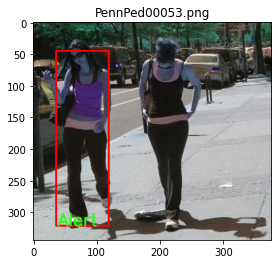

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Bounding Box Coordinates.csv')
lst  = L = df.values.tolist()

lstBB = [] #making a nested list, each list has the image name and the coordinates for the bounding box
for i in lst:
  temp = []
  for j in i[0:5]:
    temp.append(j)
  lstBB.append(temp)
import cv2


def getBB(imgName): #function to get bounding box and a given imagename
  lst1 = []
  for i in lstBB:
    if imgName == i[0]:
      lst1.append(i[1:5])
  return lst1


#def generateTitle()
#
#
#

def makeBox(imgName,title): #extracts the single object data
  BBinfo = []
  for folder in listdir('/content/ObjectTestData3'):
    for img in listdir('/content/ObjectTestData3'+'/' + folder):
      temp = []
      info = img.split('-')
      for i in info[1:5]:
        temp.append(int(i))
      temp.append(info[5])
      BBinfo.append(temp)
  #print(BBinfo)
  
  img1 = imgName.split('-')
  #print(img1[5])
  #print(img1)
  L1 = []
  for i in img1[1:5]:
    L1.append(int(i))
  #print(L1)
  #for img in listdir('/content/ObjectDetectData'):
    #if img == i[4]:
  for i in BBinfo:
    if ((i[4] == img1[5]) and i[0:4] == L1):
      #print(i[0:4])
      #print(img1[5])
      image = cv2.imread('/content/ObjectDetectData/'+img1[5])
      x2 = i[0]
      y2 = i[1]
      x1 = i[2]
      y1 = i[3]
      #print(x1)
      cv2.rectangle(image, (x1, y1), (x2, y2), (255,0,0), 2)
      cv2.putText(image, title, (x1-80, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
      #cv2.imshow(title, image) 
      plt.imshow(image)
      plt.title(img1[5])
      plt.figure()

makeBox('-36-45-119-321-PennPed00053.png','Alert')

In [ ]:
print(len(imageNAMES))
print(len(result_NN))

91
91


63


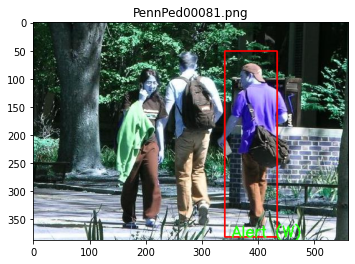

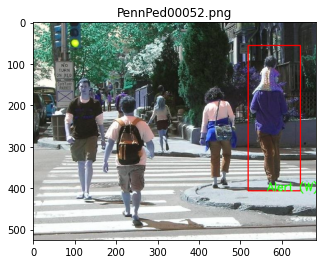

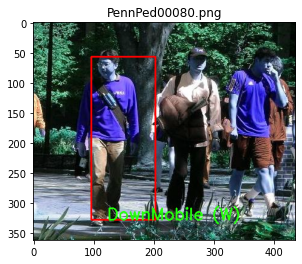

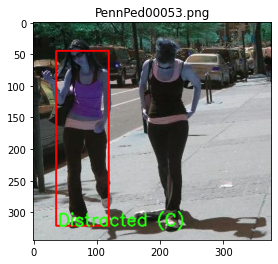

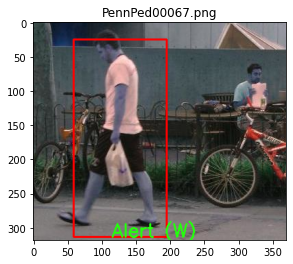

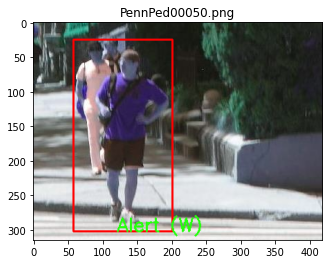

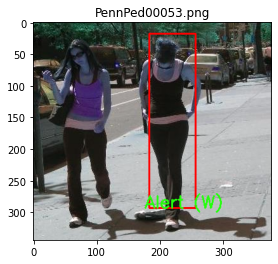

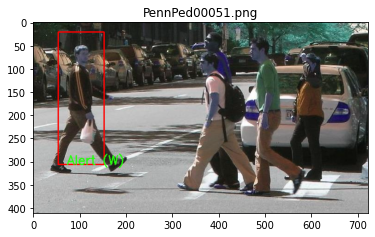

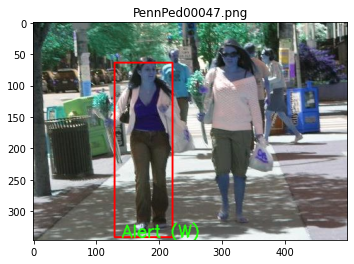

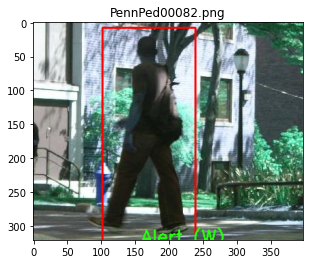

<Figure size 432x288 with 0 Axes>

In [ ]:
#For HOG + NN for 10 images plotting
print(len(result_NN_O1))
for i in range(len(result_NN_O1[0:10])):
  vec = list(result_NN_O1[i])
  Predicted.append(vec.index(max(vec)))
  #print(str(index_to_categories[vec.index(max(vec))]) )
  if (str(index_to_categories[vec.index(max(vec))]) == str(index_to_categories[Actual[i]])):
    makeBox(imageNAMES[i],str(index_to_categories[vec.index(max(vec))])+' (C)' )
  else:
    makeBox(imageNAMES[i],str(index_to_categories[vec.index(max(vec))])+' (W)' )

10


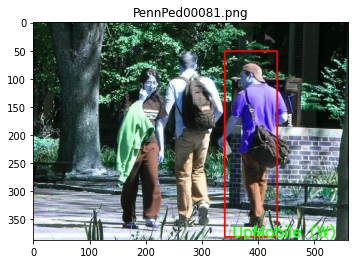

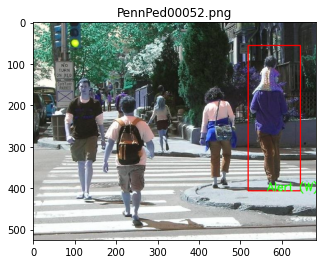

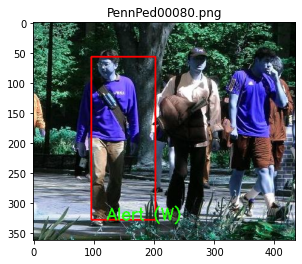

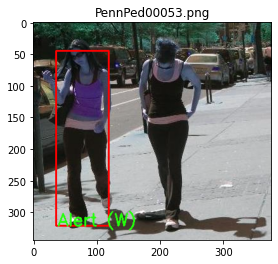

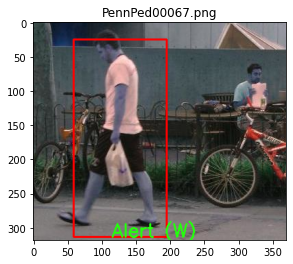

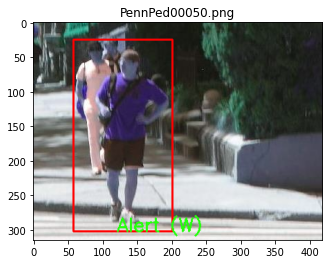

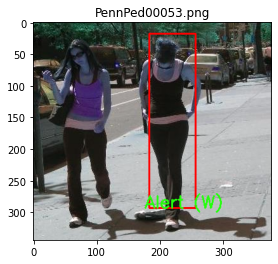

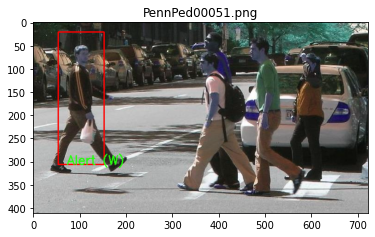

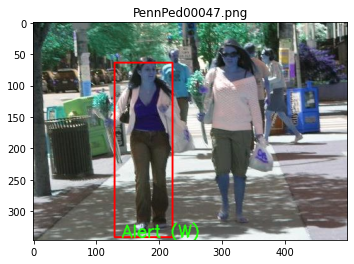

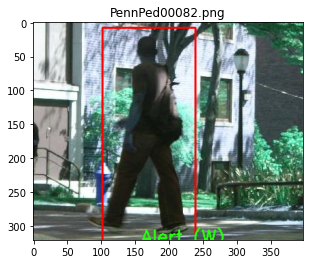

<Figure size 432x288 with 0 Axes>

In [ ]:
#For NN for 10 images
print(len(result_NN_O2[0:10]))
for i in range(len(result_NN_O2[0:10])):
  vec = list(result_NN_O2[i])
  Predicted.append(vec.index(max(vec)))
  #print(str(index_to_categories[vec.index(max(vec))]) )
  if (str(index_to_categories[vec.index(max(vec))]) == str(index_to_categories[Actual[i]])):
    makeBox(imageNAMES[i],str(index_to_categories[vec.index(max(vec))])+' (C)' )
  else:
    makeBox(imageNAMES[i],str(index_to_categories[vec.index(max(vec))])+' (W)' )